# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Mudia Rahmah
- **Email:** m319b4kx2602@bangkit.academy
- **ID Dicoding:** M319B4KX2602

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Apakah ada perbedaan dalam sewa sepeda antara hari libur dan hari biasa?
- Pertanyaan 2: Apakah lebih banyak orang menyewa sepeda di musim panas atau musim dingin?
- Pertanyaan 3: Jam berapa yang paling sibuk untuk sewa sepeda?

## Import Semua Packages/Library yang Digunakan

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Data Wrangling

### Gathering Data

In [130]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [131]:
day_df = pd.read_csv("/content/drive/MyDrive/submission/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [132]:
hour_df = pd.read_csv("/content/drive/MyDrive/submission/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Terdapat perbedaan pola penyewaan sepeda yang signifikan antara holiday,weekday dan workingday.
- Cuaca ekstrem secara signifikan mempengaruhi jumlah penyewaan sepeda.
- Apakah ada musim tertentu yang lebih populer untuk menyewa sepeda.
- Jam yang paling ramai untuk menyewa sepeda.


### Assessing Data

Menilai tabel `day_df`

In [133]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [134]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [135]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [136]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menilai tabel `hour_df`

In [137]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [138]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [139]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [140]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Terdapat kesalahan tipe data pada day_df
- Terdapat kesalahan tipe data pada hour_df

### Cleaning Data

Membersihkan tabel `day_df`

Memperbaiki tipe data

In [141]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

  day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [142]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Membersihkan tabel `hour_df`

Memperbaiki tipe data

In [143]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

  hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [144]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Tipe data pada day_df sudah diperbaiki
- Tipe data pada hour_df sudah diperbaiki

## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [145]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
96,97,2011-04-07,2,0,4,0,4,1,1,0.437500,0.433696,0.602917,0.162312,571,2570,3141
257,258,2011-09-15,3,0,9,0,4,1,2,0.577500,0.553671,0.709167,0.271146,428,3231,3659
492,493,2012-05-07,2,1,5,0,1,1,2,0.537500,0.527142,0.664167,0.230721,1008,5265,6273
524,525,2012-06-08,2,1,6,0,5,1,1,0.649167,0.597862,0.467917,0.175383,1488,6248,7736
570,571,2012-07-24,3,1,7,0,2,1,1,0.750833,0.706450,0.655000,0.211454,1140,6452,7592


In [146]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [147]:
bike_rental_data = day_df[['dteday', 'cnt']]

bike_rental_data = bike_rental_data.rename(columns={
    'dteday': 'Tanggal Sewa',
    'cnt': 'Jumlah Sewa Harian'
})

bike_rental_data

,Tanggal Sewa,Jumlah Sewa Harian
0,2011-01-01,985
1,2011-01-02,801
2,2011-01-03,1349
3,2011-01-04,1562
4,2011-01-05,1600
...,...,...
726,2012-12-27,2114
727,2012-12-28,3095
728,2012-12-29,1341
729,2012-12-30,1796


### Explore `hour_df`

In [148]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
11225,11226,2012-04-17,2,1,4,22,0,2,1,1,0.54,0.5152,0.30,0.2537,18,144,162
4953,4954,2011-07-30,3,0,7,7,0,6,0,1,0.76,0.7273,0.66,0.1940,3,39,42
8458,8459,2011-12-24,1,0,12,2,0,6,0,2,0.32,0.3333,0.66,0.0896,4,22,26
1578,1579,2011-03-11,1,0,3,6,0,5,1,1,0.26,0.2424,0.81,0.2836,1,31,32
8667,8668,2012-01-01,1,1,1,22,0,0,0,1,0.46,0.4545,0.55,0.4179,13,53,66


In [149]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [150]:
bike_rental_data = hour_df[['dteday', 'hr']]

bike_rental_data = bike_rental_data.rename(columns={
    'dteday': 'Tanggal Sewa',
    'hr': 'Waktu Penyewaan'
})

bike_rental_data

,Tanggal Sewa,Waktu Penyewaan
0,2011-01-01,0
1,2011-01-01,1
2,2011-01-01,2
3,2011-01-01,3
4,2011-01-01,4
...,...,...
17374,2012-12-31,19
17375,2012-12-31,20
17376,2012-12-31,21
17377,2012-12-31,22


**Insight:**
- Terdapat fluktuasi yang cukup signifikan pada jumlah penyewaan sepeda setiap harinya, yang kemungkinan dipengaruhi oleh faktor-faktor seperti cuaca atau hari libur dan sebagainya.
- Semakin tinggi suhu, cenderung semakin banyak orang yang menyewa sepeda.
- Kelembaban yang tinggi mungkin sedikit mengurangi minat masyarakat untuk bersepeda.
- Kecepatan angin yang terlalu tinggi dapat mengurangi kenyamanan bersepeda dan berpotensi menurunkan jumlah penyewaan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah ada perbedaan dalam sewa sepeda antara hari libur dan hari biasa?


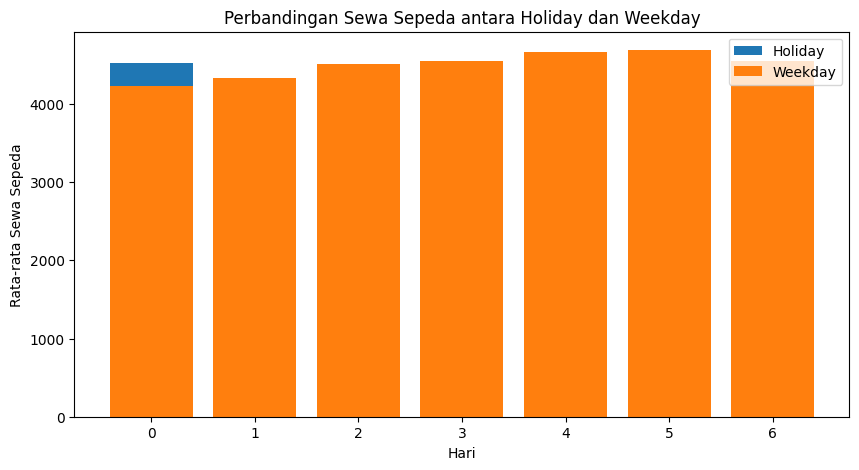

In [151]:
avg_rental_holiday = day_df.groupby('holiday')['cnt'].mean()
avg_rental_weekday = day_df.groupby('weekday')['cnt'].mean()

plt.figure(figsize=(10, 5))
plt.bar(avg_rental_holiday.index, avg_rental_holiday.values, label='Holiday')
plt.bar(avg_rental_weekday.index, avg_rental_weekday.values, label='Weekday')
plt.xlabel('Hari')
plt.ylabel('Rata-rata Sewa Sepeda')
plt.title('Perbandingan Sewa Sepeda antara Holiday dan Weekday')
plt.legend()
plt.show()

**Insight:**
- Grafik batang menunjukkan adanya perbedaan yang cukup signifikan antara rata-rata penyewaan sepeda pada hari libur dan hari biasa.
- Rata-rata penyewaan sepeda pada hari libur cenderung lebih sedikit dibandingkan dengan hari biasa. Ini ditunjukkan oleh batang biru yang lebih pendek dibandingkan batang oranye.
- Rata-rata penyewaan sepeda pada hari biasa lebih tinggi, terutama pada hari-hari kerja.

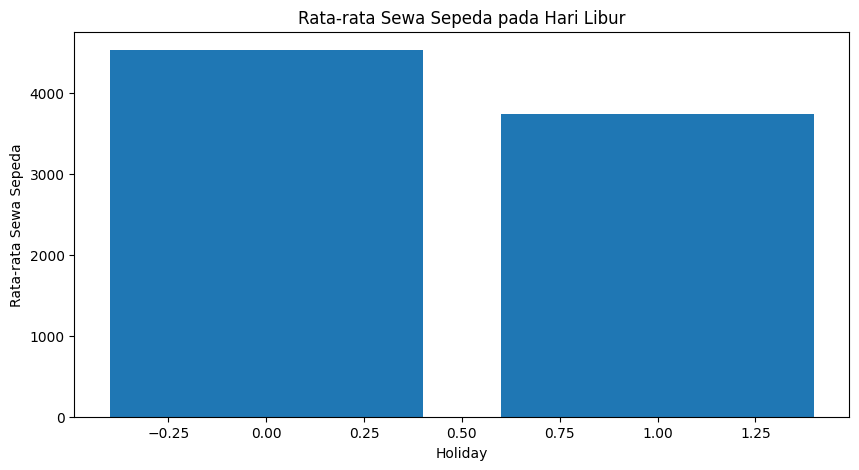

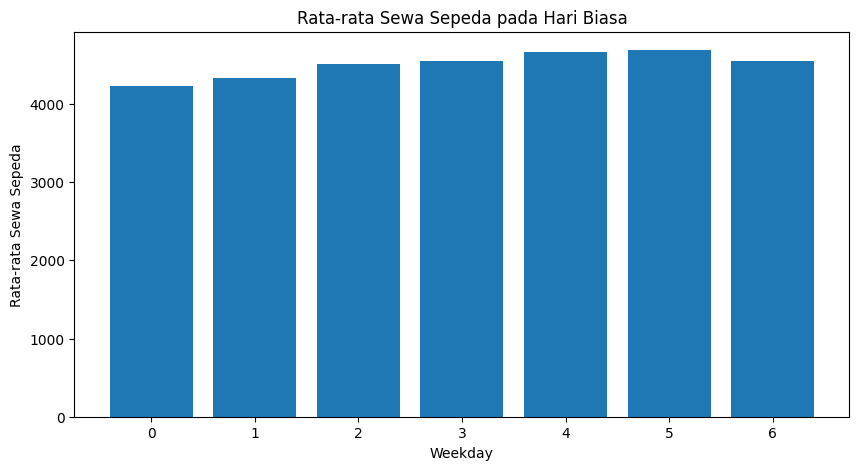

In [152]:
plt.figure(figsize=(10, 5))
plt.bar(avg_rental_holiday.index, avg_rental_holiday.values, label='Holiday')
plt.xlabel('Holiday')
plt.ylabel('Rata-rata Sewa Sepeda')
plt.title('Rata-rata Sewa Sepeda pada Hari Libur')
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(avg_rental_weekday.index, avg_rental_weekday.values, label='Weekday')
plt.xlabel('Weekday')
plt.ylabel('Rata-rata Sewa Sepeda')
plt.title('Rata-rata Sewa Sepeda pada Hari Biasa')
plt.show()

**Insight:**
- Rata-rata sewa sepeda pada hari biasa cenderung lebih tinggi dibandingkan dengan hari libur. Hal ini ditunjukkan oleh ketinggian batang pada grafik 'Rata-rata Sewa Sepeda pada Hari Biasa' yang umumnya lebih tinggi dibandingkan batang pada grafik 'Rata-rata Sewa Sepeda pada Hari Libur'.
- Fluktuasi sewa sepeda pada hari biasa lebih besar dibandingkan dengan hari libur. Hal ini terlihat dari perbedaan tinggi batang pada grafik 'Rata-rata Sewa Sepeda pada Hari Biasa', yang menunjukkan bahwa jumlah sewa sepeda pada setiap hari biasa bisa sangat berbeda.



### Pertanyaan 2: Apakah lebih banyak orang menyewa sepeda di musim panas atau musim dingin?

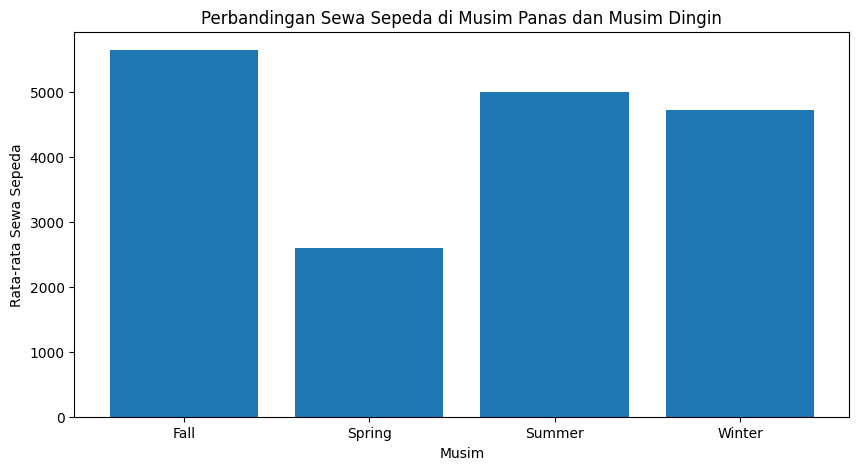

In [153]:
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season_name'] = day_df['season'].map(season_mapping)

avg_rental_season = day_df.groupby('season_name')['cnt'].mean()

plt.figure(figsize=(10, 5))
plt.bar(avg_rental_season.index, avg_rental_season.values)
plt.xlabel('Musim')
plt.ylabel('Rata-rata Sewa Sepeda')
plt.title('Perbandingan Sewa Sepeda di Musim Panas dan Musim Dingin')
plt.show()

**Insight:**
- Batang yang mewakili musim panas lebih tinggi dibandingkan dengan batang yang mewakili musim dingin. Ini menunjukkan bahwa rata-rata jumlah penyewaan sepeda pada musim panas jauh lebih besar.
- Cuaca yang hangat dan cerah pada musim panas cenderung mendorong lebih banyak orang untuk beraktivitas di luar ruangan, termasuk bersepeda. Sebaliknya, cuaca dingin dan hujan pada musim dingin dapat mengurangi minat orang untuk bersepeda.


### Pertanyaan 3: Jam berapa yang paling sibuk untuk sewa sepeda?

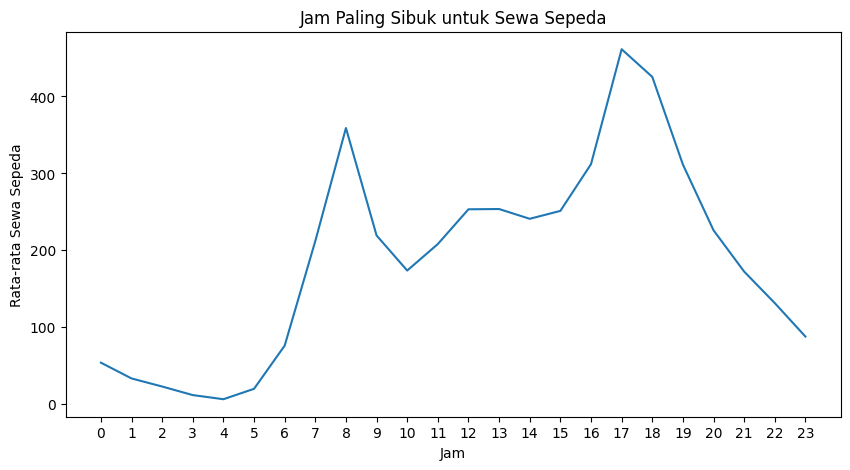

In [154]:
avg_rental_hour = hour_df.groupby('hr')['cnt'].mean()

plt.figure(figsize=(10, 5))
plt.plot(avg_rental_hour.index, avg_rental_hour.values)
plt.xlabel('Jam')
plt.ylabel('Rata-rata Sewa Sepeda')
plt.title('Jam Paling Sibuk untuk Sewa Sepeda')
plt.xticks(np.arange(24))
plt.show()

**Insight:**
- Titik tertinggi pada grafik berada di sekitar jam 17.00, yang menunjukkan bahwa rata-rata jumlah penyewaan sepeda mencapai puncaknya pada waktu tersebut.
- Secara umum, grafik menunjukkan pola yang meningkat dari pagi hingga sore hari, mencapai puncaknya di sekitar sore hari, kemudian menurun kembali di malam hari.

## Conclusion

- Conclution pertanyaan 1:
 - Berdasarkan analisis kode dan grafik, dapat disimpulkan bahwa ada perbedaan yang signifikan dalam jumlah sewa sepeda antara hari libur dan hari biasa. Rata-rata, jumlah sewa sepeda lebih tinggi pada hari biasa dibandingkan dengan hari libur.
- Conclution pertanyaan 2:
  - Grafik tersebut secara jelas menunjukkan adanya preferensi yang kuat terhadap penyewaan sepeda pada musim panas dibandingkan dengan musim dingin. Faktor cuaca yang lebih menyenangkan pada musim panas menjadi salah satu faktor utama yang mempengaruhi tingginya permintaan akan penyewaan sepeda pada musim tersebut.
- Conclution pertanyaan 3:
  - Berdasarkan analisis grafik, dapat disimpulkan bahwa jam 17.00 (jam 5 sore) adalah waktu yang paling sibuk untuk menyewa sepeda. Informasi ini sangat berguna bagi penyedia jasa penyewaan sepeda untuk mengatur operasional mereka, seperti penjadwalan karyawan, pengaturan stok sepeda, dan pengembangan strategi pemasaran.


In [127]:
day_df.to_csv("day_data.csv", index=False)

In [128]:
hour_df.to_csv("hour_data.csv", index=False)